In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [10]:
data = 'mtcars.csv'
cars=pd.read_csv(data)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
cars.columns= ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
cars_data=cars.ix[:,(5,11)].values
cars_data_names = ['drat','carb']
y = cars.ix[:,9].values

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


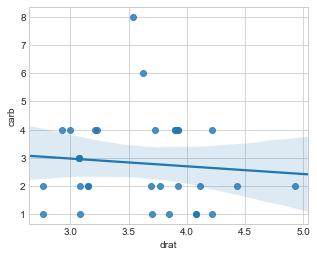

In [13]:
sb.regplot(x='drat', y='carb', data=cars, scatter=True)

In [15]:
drat=cars['drat']
carb=cars['carb']

spearmanr_coefficient, pvalue = spearmanr(drat,carb)
print(spearmanr_coefficient)

-0.12522293992


In [16]:
cars.isnull()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
cars.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

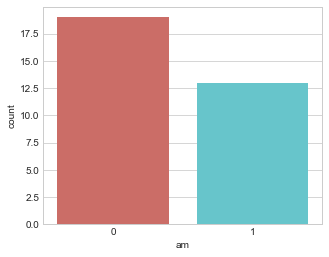

In [18]:
sb.countplot(x='am', data=cars, palette='hls')

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [20]:
x=scale(cars_data)

In [21]:
LogReg = LogisticRegression()

LogReg.fit(x,y)
LogReg.score(x,y)

0.8125

In [22]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)

0.81781376518218629